<a href="https://colab.research.google.com/github/Biswajitjitu6/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME   - HEALTH INSURANCE CROSS SELL PREDICTION**



**Project Type** - Classification

**Contribution** - Individual

**Team Member** - Biswajit Sahoo

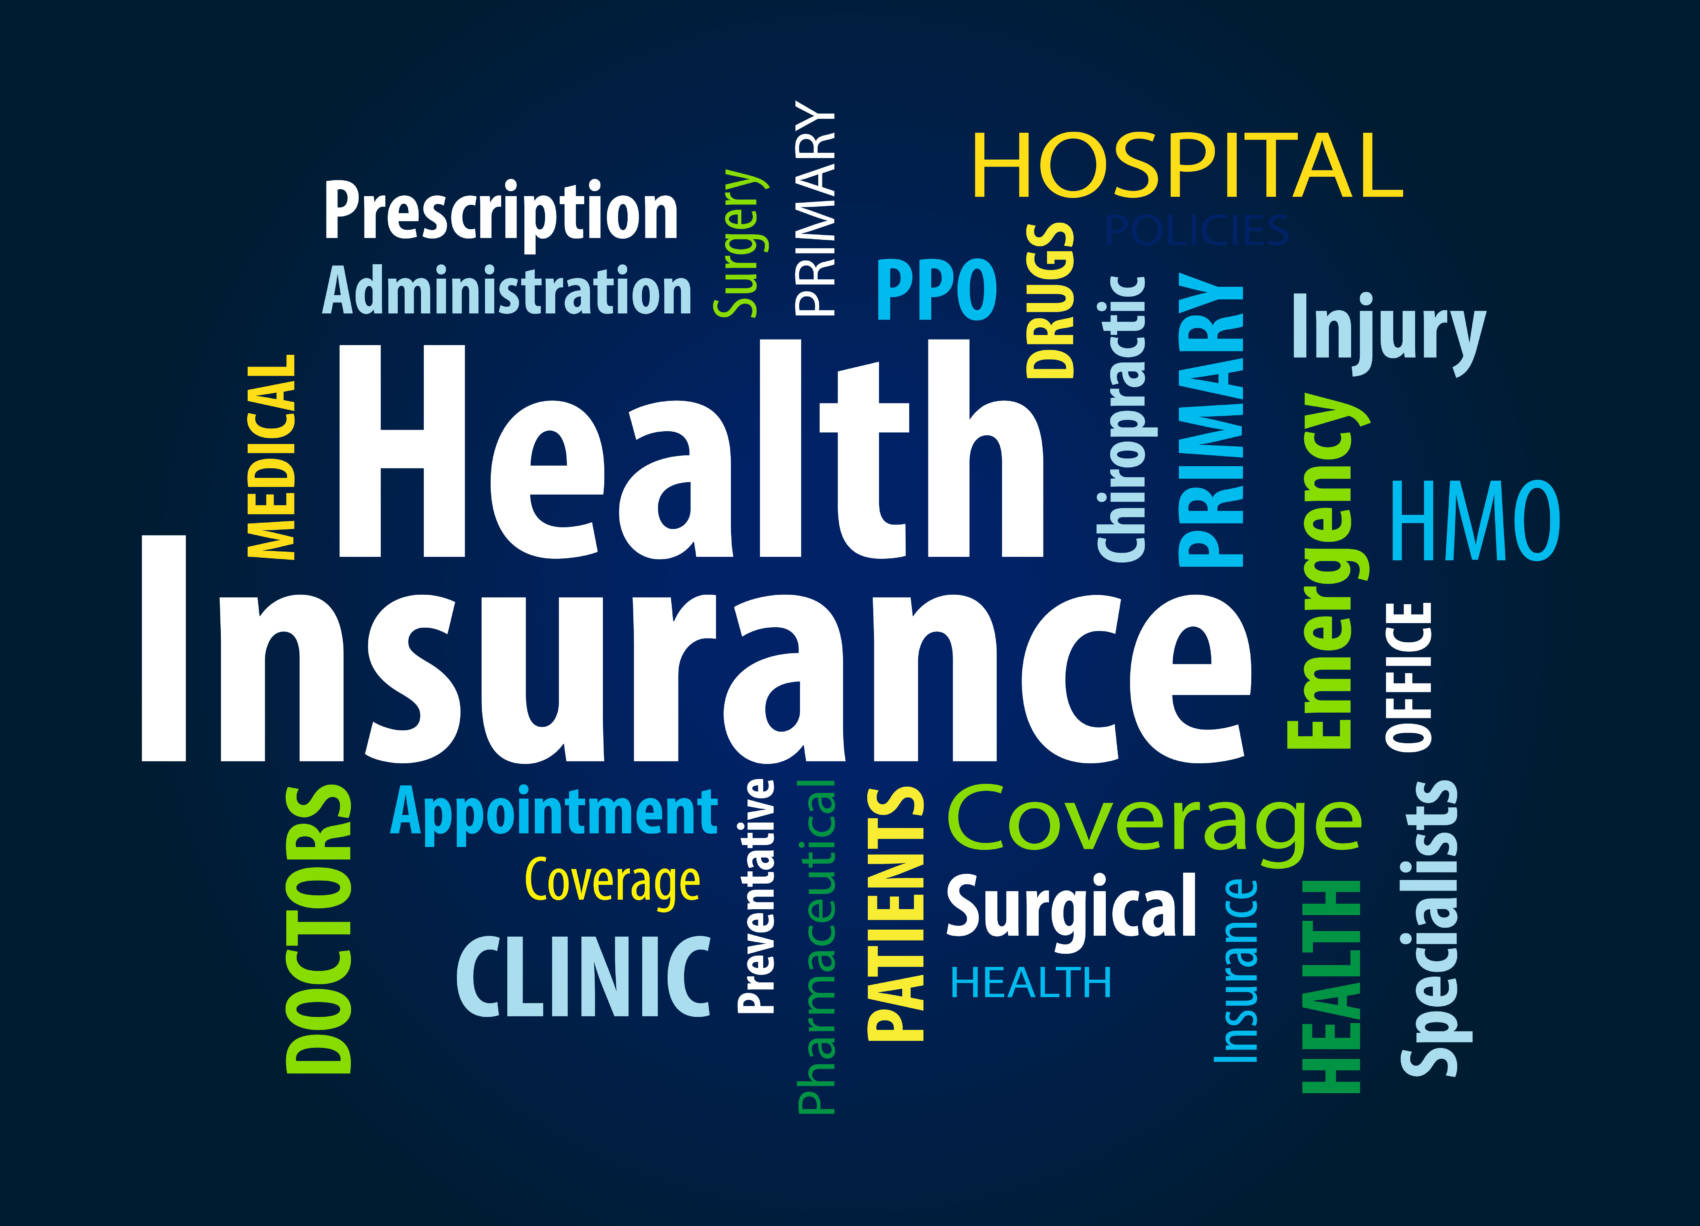

## **Project Summary -**

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. There are multiple factors that play a major role in capturing customers for any insurance policy. Here we have information about demographics such as age, gender, region code, and vehicle damage, vehicle age, annual premium, policy sourcing channel. Based on the previous trend, this data analysis and prediction with machine learning models can help us understand what are the reasons for news popularity on social media and obtain the best classification model.

We have a dataset which contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. related to a person who is interested in vehicle insurance. We have 381109 data points available.

Predicting whether a customer would be interested in buying Vehicle Insurance so that the company can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.



## **GitHub Link -**
https://github.com/Biswajitjitu6/Health-Insurance-Cross-Sell-Prediction/tree/main

## **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# ***Let's Start !***

## **1. Know Your Data**

### Import Libraries

In [ ]:
pip install imblearn

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings;warnings.simplefilter('ignore')
import time

# Used in Hypothesis Testing
from scipy.stats import *
import math

# Used in data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Used in Feature Engineering
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

# Used in Data Scaling
from sklearn.preprocessing import StandardScaler

# Used in Splitting data
from sklearn.model_selection import train_test_split

# Used in Oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Used in ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn import metrics

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

### Dataset Loading

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter Projects/Classification/Health Insurance Cross Sell Prediction.csv")

### Dataset First View

In [ ]:
# Dataset
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

#### **What did you know about your dataset?**
- The dataset given is a dataset from Health Insurance industry, and we have to analysis the response of customers and the insights behind it.

- Sell prediction is analytical studies on the possibility of a customer abandoning service. The goal is to understand and take steps to change it before the costumer gives up the service.

- The above dataset has 381109 rows and 12 columns. There are no mising values and duplicate values in the dataset.

## **2. Understanding the Variables**

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

*  **id** : Unique ID for the customer
*  **Gender** : Gender of the customer

*  **Age** : Age of the customer
*   **Driving_License 0** : Customer does not have DL, **1** : Customer already has DL

*   **Region_Code** : Unique code for the region of the customer
*  **Previously_Insured : 1** : Customer already has Vehicle Insurance, **0** : Customer doesn't have Vehicle Insurance

*  **Vehicle_Age** : Age of the Vehicle
*  **Vehicle_Damage :1** : Customer got his/her vehicle damaged in the past. **0** : Customer didn't get his/her vehicle damaged in the past.

*  **Annual_Premium**: The amount customer needs to pay as premium in the year
*   **PolicySalesChannel** : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

*   **Vintage** : Number of Days, Customer has been associated with the company
*  **Response : 1** : Customer is interested, **0** : Customer is not interested














## **3. Data Wrangling**

In [ ]:
# numericals column cols
numerical_cols = list(df.describe())
numerical_df = df[numerical_cols]
numerical_df.head()

In [ ]:
# Assingning catagoricals column of df to variable catagorical_cols
categorical_cols=list(set(df.columns)-set(numerical_cols))
categorical_df=df[categorical_cols]
categorical_df.head()

In [ ]:
df.describe(include='O')

#### What have you done and insights you found?
- In this dataset, there are no missing values in the numeric variables and no categorical variables with more than two categories. 
- The numeric and categorical variables are divided into two datasets: numerical_df and categorical_df. 
- The numeric_df contains all numeric columns and the categorical_df contains all categorical columns. 
- In numerical_df there are three columns named gender, vehicle age, and vehicle damage; none of these variables is unique across both datasets. 
- In categorical_df , there are two unique values for each of these three variables (gender, vehicle age, and vehicle damage). 

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Chart - 1** - Countplot on dependent variable (Response)

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(df['Response'], data=df,ax = axes[0],palette = 'BrBG')
plt.title('Not-Interested vs Interested Policyholders', fontsize=13) #title for the countplot
colors = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#b9f2f0']
df['Response'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[1],explode = [0.02,0.02],colors = colors, figsize=(15,7))
plt.show()
fig.tight_layout()
plt.tight_layout()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, counts of values for the different levels of a categorical or nominal variable.

- To show the count of interested and not-interested of policyholders , I have used Countplot.

**2. What is/are the insight(s) found from the chart?**
- The dependant variable has binary values of 0 and 1. We can infer from the plot above that many clients have no interest in purchasing vehicle insurance. 12.2 percent of the data are 1's and 87.7 percent of the data are 0s. This data must be handled using the imbalance technique since the output feature is unbalanced.

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

No, the gained insights help a positive business impact.

No, there are no such insights that lead to negative growth.

### **Chart - 2 -** Piechart on independent variable (Gender)

In [ ]:
# # Analyzing Gender feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#8de5a1', '#B7C3F3', '#DD7596', '#8EB897']
df['Gender'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'GnBu_r', hue = 'Gender',)
plt.title('Distribution of Gender',fontsize=10)
fig.tight_layout()

**1. Why did you pick the specific chart?**
- A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Gender.

**2. What is/are the insight(s) found from the chart?**
- From the above pie chart i found there is 206089 male i.e., (54.1 %) and 175020 female i.e., (45.9 %). So , we can say that gender variable is almost equally distributed but male are liitle bit more in comparison to female.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- No, the gained insights didn't create a positive business impact.

- No, there are no such insights that lead to negative growth.


### **Chart - 3 -** Countplot on independent variable(Driving_License)

In [ ]:
print(df.Driving_License.value_counts())
print('\n')

In [ ]:

# Analyzing Driving_License feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = [ '#DD7596', '#8EB897']
df['Driving_License'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'ch:s=.25,rot=-.25', hue = 'Driving_License',)
     

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the Driving License holders vs non holders. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above countplot i found their are 380297 people those who have the driving license and 812 people are not having driving license. So , we can say that driving license variable is almost equally distributed.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- No, the gained insights didn't create a positive business impact.

- No, there are no such insights that lead to negative growth.

### **Chart - 4 -** Countplot on independent variable(Vehicle_Age) 

In [ ]:
print(df.Vehicle_Age.value_counts())
print('\n')

In [ ]:
print(df.Vehicle_Age.value_counts())
# Analyzing Vehicle Age feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df['Vehicle_Age'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Vehicle_Age',)
plt.title('Vehicle_Age Distribution',fontsize=10)
fig.tight_layout()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the Vehicle age distribution. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above countplot, we can say that most of the people having those vehicle whose age in range 1-2 years in comparison others two.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- No, the gained insights didn't create a positive business impact.

- No, there are no such insights that lead to negative growth.

### **Chart - 5 -** Piechart on independent variable(Vehicle_Damage)

In [ ]:
print(df.Vehicle_Damage.value_counts())
print('\n')

In [ ]:
# Analyzing Vehicle_Damage feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#8de5a1', '#B7C3F3', '#DD7596', '#8EB897']
df['Vehicle_Damage'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'GnBu_r', hue = 'Vehicle_Damage',)
plt.title('Vehicle_Damage Distribution',fontsize=10)
fig.tight_layout()

**1. Why did you pick the specific chart?**
- A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Vehicle Damage.

**2. What is/are the insight(s) found from the chart?**
- From the above pie chart i found there are 192413 i.e., (50.5 %) people whose vrhicle is damage and 188696 i.e., (49.5 %) are those people whose vehicle is not damage. So , we can say that Vehicle_Damage variable is almost equally distributed.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- No, the gained insights didn't create a positive business impact.

- No, there are no such insights that lead to negative growth.

### **Chart - 6 -** Countplot on independent variable(Previously_Insured)

In [ ]:
print(df.Previously_Insured.value_counts())
print('\n')

In [ ]:
# Analyzing Previously_Insured feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df['Previously_Insured'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'GnBu_r', hue = 'Previously_Insured',)
plt.title('Previously_Insured Distribution',fontsize=10)

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the Vehicle Previously Insured. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above countplot, i found that there ar 206481 those people who not insured previously and 174628 are those people who insured previously, which is almost equally distributed but Previously Insured people are little bit more in comparison to not insured people.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- No, the gained insights didn't create a positive business impact.

- No, there are no such insights that lead to negative growth.

### **Chart - 7 -** Countplot on response based on gender

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(df['Gender'], hue= df['Response'],palette = 'GnBu_r')
plt.title('Response in Male and Female category', fontsize=10)
plt.show()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the response on gender. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above countplot, We can see that males are more likely to purchase vehicle insurance.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- Yes, the gained insights help to create a positive impact on business because the males are more likely to purchase vehicle insurance.

- No, there are no such insights that lead to negative growth.

### **Chart - 8 -** Countplot on Age Vs Response

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue='Response', data=df, palette = 'Dark2')
plt.title('Response in terms of Age', fontsize=10)
plt.show()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the Age Vs Response. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above countplot,We can see that Ages below 30 are not more interested in purchasing vehicle insurance may be because lack of experience and maturity levels.

- People who are above 30-60 are more likely to be interested.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples whose age in between 30-60.

- No, there are no such insights that lead to negative growth.



### **Chart - 9 -** Countplot on Driving License Vs Response

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Driving_License',hue='Response',data=df, palette = 'BuGn')
plt.title('Driving License Vs Response',fontsize=10)
plt.show()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable. To show the Driving License Vs Response. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above countplot, we can say that, Customers who are interested in Vehicle insurance are almost having the driving license.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**
- Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having driving license.

- No, there are no such insights that lead to negative growth.

### **Chart - 10 -** Countplot on Previously Insured Vs Response.

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="Previously_Insured",hue ="Response",data=df, palette = 'Dark2')
plt.title('Response in terms of Previously Insured ', fontsize=10)
plt.show()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the Previously Insured Vs Response. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above count-plot, we found that their are almost everyone is purchase insurence those are previously insured.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having Previously insured.

- No, there are no such insights that lead to negative growth.

### **Chart - 11 -** Countplot on Vehicle age Vs Response

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Vehicle_Age',hue='Response',data=df,palette=['#221f1f', '#b20710'])
plt.title('Vehicle age Vs Response',fontsize=10)
plt.show()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the Previously Insured Vs Response. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above graph, we can say that customers whose vehicle age is between 1-2 years are most likely to be interested when compared to the other two.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

- Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we have a lower number of policyholders with vehicles older than two years, so we must focus more on the other two categories. .

- No, there are no such insights that lead to negative growth.

### **Chart - 12 -** Countplot on Region code Vs Response

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(22,6))
sns.countplot(x='Region_Code',hue='Response',data=df, palette = 'Dark2')
plt.title('Region code Vs Response',fontsize=10)
plt.xticks(rotation = 90)
plt.show()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable. To show the Previously Insured Vs Response. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- From the above graph, i found that the Region Code - 0.28 has more customers in comparison to others region codes.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

- Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we can target the people of region code 0.28.

- No, there are no such insights that lead to negative growth.

### **Chart - 13 -** Countplot on Vehicle_Damage Vs Response

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Vehicle_Damage',hue='Response',data=df,palette=['#221f1f', '#b20710'])
plt.title('Vehicle_Damage Vs Response')
plt.show()

**1. Why did you pick the specific chart?**
- Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

- To show the Vehicle Damage Vs Response. I have used countplot.

**2. What is/are the insight(s) found from the chart?**
- We can infer from the above plot that those people whose vehicle is damage are taking insurence more in comparison those who's vehicle are not damaged.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

- Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we can target those people whose vehicles are damaged.

- No, there are no such insights that lead to negative growth.

### **Chart - 14 -** Correlation Heatmap

In [ ]:
import plotly.figure_factory as ff

# Create a correlation matrix
corr_matrix = df.corr()

# Create an interactive correlation heatmap using plotly
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  annotation_text=corr_matrix.round(2).values,
                                  colorscale='Blues')
fig.update_layout(title='Interactive Correlation Heatmap')
fig.show()


**1. Why did you pick the specific chart?**
- A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

- Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

**2. What is/are the insight(s) found from the chart?**
Observations based on correlation plot:-

- Target variable ( Response ) is not much affected by Vintage variable. we can drop least correlated variable.

- From the above correlation heatmap, we can see that the policy_sales_channel and age is negatively correlated.

- Rest all correlation can be depicted from the above chart.

## **5. Feature Engineering & Data Pre-processing**

In [ ]:
# Creating a copy of the dataset for further feature engineering
df_1 = df.copy()

### **1.Handling Missing Values**

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_1.isnull().sum())

**What all missing value imputation techniques have you used and why did you use those techniques?**
- There are no missing values to handle in the given dataset.

### **2. Handling Outliers**

In [ ]:
# Handling Outliers & Outlier treatments
# Checking Outliers with boxplot
for column_name in numerical_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(df_1[column_name])
  plt.show()

In [ ]:
#Function for checking outliers
def check_outlier(start,end,step,column_name):
  for i in range(start,end,step):
    n = column_name.values
    n = np.sort(n)
    print('{} percentile value is {}'.format(i,int(column_name.quantile(i/100))))
  print('{} percentile value is {}'.format(end,int(column_name.quantile(end/100))))

In [ ]:
#Checking outliers of Annual_Premium
check_outlier(0,100,10,df_1['Annual_Premium'])

In [ ]:
#Checking outliers of Annual_Premium
check_outlier(10,20,1,df_1['Annual_Premium'])

In [ ]:
#Checking outliers of Annual_Premium
check_outlier(90,100,1,df_1['Annual_Premium'])

In [ ]:
# Removing outliers of column Annual_Premium
df_1 = df_1.drop(df_1[df['Annual_Premium'] < 19050].index)
df_1 = df_1.drop(df_1[df['Annual_Premium'] > 60680].index)

In [ ]:
# Again checking outliers are removed or not
plt.figure(figsize=(12,6))
sns.boxplot(df_1['Annual_Premium'])
plt.show()

**-What all outlier treatment techniques have you used and why did you use those techniques?**

- I used 2 outlier treatment techniques to check outliers boxplot and quantile because in these techniques i can easily find the outliers after which value it started.

### **3. Categorical Encoding**

In [ ]:
# Encode your categorical columns
# Label Encoder on Vehicle damage
le = LabelEncoder()
df_1['Vehicle_Damage'] = le.fit_transform(df_1['Vehicle_Damage'])

In [ ]:
# Changing categorical value to numerical values
df_1 = pd.get_dummies(df_1, columns = ['Gender','Vehicle_Age'])

In [ ]:
df_1.head()

**What all categorical encoding techniques have you used & why did you use those techniques?**
- I have used Label Encoding technique for Vehicle_Damage column and One Hot Encoding for Gender, Vehicle_Age Column. I have used label encoding, because there are only 2 unique values (Yes,No) in column which needed to be encoded.
- After applying lable encoder the vehicle damge column value has been changed to binary number. i.e 1 and 0
- After applying one hot encoding the two new columns are created based on gender column. i.e gender_male and gender_female.
- Likewise three new columns are created based on vehicle age.

## **4. Feature Manipulation & Selection**

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Contain all independent variables
x = df_1.drop(['Response'], axis=1)

#Contain Dependent variable
y = df_1['Response'] 

#### 2. Feature Selection

In [ ]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df_1)
variance_threshold.get_support()

**1. What is variance threshold technique ?**
- The variance threshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features with the same value in all samples.

**2. Why did you used here?**
- To check if the certain condition meet or not.

**3. what you get from this?**
- As we saw all outputs are true, we conclude that there is no features that contains zero variance.

In [ ]:
#Implementation ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

In [ ]:
# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)

In [ ]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize = (24,10))
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' , fontsize = 15)
plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 15)
plt.xticks(rotation = 25)
plt.show()

In [ ]:
feat_importances_Series = pd.Series( feature_importance_normalized , index=x.columns)
print("Feature Name\t\t Importance")
print("-"*37 , end='\n')
feat_importances_Series.sort_values()

In [ ]:
# Dropping less important features
df_1.drop(columns=['Driving_License','Gender_Female','Gender_Male','id'],inplace=True)

In [ ]:
# Select your features wisely to avoid overfitting
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = df_1.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)
plt.show()

In [ ]:
# Well on the above heat chart we can find that the columns Previously_insured and vehicle_damaged is Highly Correlated here.
#Creating function to see the Highly correlated variable , using our provided threshold.
def correlation(df, threshold):
    col_corr = set()  
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
# Mostly 0.85 is considered for Highly correlated , so its not above 0.85 .
corr_features = correlation(df, 0.75)
len(set(corr_features))

print(corr_features)

##### **1. What all feature selection methods have you used  and why?**
- I used three method for feature selection Variance threshold, Extra Tree classification and correlation map. 
- I used Variance threshold to check the which columns has constant values, Tree classification for checking whuch columns are less important for the dependent variable and correlation map for the removing of high correlation variables.

##### **2. Which all features you found important and why?**
- 'Age',
- 'Region_Code',
- 'Previously_Insured',
- 'Vehicle_Age',
- 'Vehicle_Damage',
- 'Annual_Premium',
- 'Policy_Sales_Channel','Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Year'

 I found these features are imprtant from the above obervation.

### 3. Data Splitting

In [ ]:
#Contain all independent variables
X = df_1.drop(['Response'], axis=1)

#Contain Dependent variable
Y = df_1['Response'] 

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

##### **What data splitting ratio have you used and why?**
- I used 80% data for training and 20% of data for test because it gives the best results.

### 4. Handling Imbalanced Dataset

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df_1.Response.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_1['Response'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=False,
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
plt.title('Before Upsampling', )
plt.show()

##### **Do you think the dataset is imbalanced? Explain Why?**
- One of the most significant challenges when dealing with unbalanced datasets is the metrics used to evaluate their model. 
- Using simpler metrics, such as accuracy score, can be misleading. In a dataset with highly unbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis, and while it will have a high accuracy rate, it will often be incorrect.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# using Smote Oversampling
sm = SMOTE(random_state=5)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# create a Pandas series with the upsampled target variable
y_resampled_series = pd.Series(y_train)

# count the number of occurrences of each class in the upsampled target variable
class_counts = y_resampled_series.value_counts()

# create a pie chart to show the distribution of classes in the upsampled target variable
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',colors=["b", "c"])
plt.title('After Upsampling', )
plt.show()

In [ ]:
# Checking Shape after resampling
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

##### **What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)**
- The dataset has now been balanced using the oversampling technique, and it is ready for training the model.we have used SMOTE and oversampling technique. oversampling performing better.

### 5. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### **Which method have you used to scale you data and why?**
- We used Standardization (StandardScaler) method for Data Scaling.

- Standardization Here all the features will be transformed in such a way that it will have the properties of a standard normal distribution with mean (μ) = 0 and standard deviation(σ)=l.

## ***6. ML Model Implementation***

Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

Dataset has more than 300k records

cannot go with SVM Classifier as it takes more time to train as dataset increase

Idea is to start selection of models as:

 **1.Logistic Regression**

 **2.Decision Tree**

 **3.Gaussian Naive Bayes**

**4.AdaBoost Classifier**

 **5.XGBClassifier**

**6.Bagging Classifier**

**7.Lightgbm Classifier**

### Functions used in ML implementation

In [ ]:
# Function for ploting confusion matrix 
def plot_confusion_matrix(X_test, y_test, y_pred_test):
    
    label = ['1', '0']
    cm = confusion_matrix(y_test, y_pred_test)
    group_names = ['True positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    ax.set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})
    ax.xaxis.set_ticklabels(label)
    ax.yaxis.set_ticklabels(label)

    plt.show()

In [ ]:
# Function for ploting roc curve
def plot_roc_curve(model, X_test, y_test, y_pred):

    pred_proba = model.predict_proba(X_test)
    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)     
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)
    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
    plt.legend(loc='best')

    plt.show()

In [ ]:
#Function Evaluation matrices before tuning
models = []
Train_Accuracy=[]
Train_Precision=[]
Train_Recall=[]
Train_F1_Score=[]
Train_ROC_AUC_Score=[]
Train_Log_Loss=[]
def Performance(model,y_tset, y_pred):
  models.append(type(model).__name__)
  acs = accuracy_score(y_tset, y_pred)
  Train_Accuracy.append(accuracy_score(y_test,y_pred))
  ps = precision_score(y_tset, y_pred)
  Train_Precision.append(precision_score(y_test,y_pred))
  rs = recall_score(y_tset, y_pred)
  Train_Recall.append(recall_score(y_test,y_pred))
  f1s = f1_score(y_tset, y_pred)
  Train_F1_Score.append(f1_score(y_test,y_pred))
  ras = roc_auc_score(y_tset, y_pred)
  Train_ROC_AUC_Score.append(roc_auc_score(y_test, y_pred))
  ll = log_loss(y_test, y_pred)
  Train_Log_Loss.append(log_loss(y_test, y_pred))
  print('*'*115)
  print('Accuracy Score','    Train_Precision Score','    Train_Recall Score','      F1 Score','           ROC AUC Score','     Log Loss')
  print(acs, ps, rs,f1s, ras,ll)

In [ ]:
# Function for Evaluation Metrics after tuning
Accuracy=[]
Precision=[]
Recall=[]
F1_Score=[]
ROC_AUC_Score=[]
Log_Loss=[]
def evaluation_metrics(model,y_test,y_pred):
    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    Accuracy.append(accuracy_score(y_test,y_pred))
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    Precision.append(precision_score(y_test,y_pred))
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    Recall.append(recall_score(y_test,y_pred))
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    F1_Score.append(f1_score(y_test,y_pred))
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    ROC_AUC_Score.append(roc_auc_score(y_test, y_pred))
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss
    Log_Loss.append(log_loss(y_test, y_pred))
    metrics_df = pd.DataFrame(metrics_dict)
    print('*'*75)
    print(metrics_df)

In [ ]:
#Function for hyperparameter tunning
def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_model = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)

    print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)
    
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model

## ML Model - 1 - **Implementing Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
model1 = LogisticRegression()

# Fit the Algorithm
model1 = model1.fit(X_train,y_train)

# Predict on the model
train_class_preds = model1.predict(X_train)
test_class_preds = model1.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Evaluation Metrics before tuning
print(f'\nEvaluation of {type(model1).__name__} before tuning:\n')
Performance(model1,y_test, test_class_preds)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, test_class_preds)

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model1, parameters_logistic, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model1).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model1,y_test,tuned_pred)


In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

##### **Which hyperparameter optimization technique have you used and why?**
- I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it very less time in comparison to others techniques.
##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
- I have seen No improvement after tunning.

## ML Model - 2 - **Implementing DecisionTreeClassifier**

In [ ]:
# ML Model - 2 Implementation (DecisionTreeClassifier)
model2 = DecisionTreeClassifier()

# Fit the Algorithm
model2 = model2.fit(X_train,y_train)

# Predict on the model
train_class_preds = model2.predict(X_train)
test_class_preds = model2.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model2).__name__} before tuning:\n'+'-----'*23)
Performance(model2,y_test, test_class_preds)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model2, X_test, y_test, test_class_preds)

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}
                       
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model2, parameters_decision_tree, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model2).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model2,y_test,tuned_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

##### **Which hyperparameter optimization technique have you used and why?**
- I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it very less time in comparison to others techniques.
##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
- After the hyperparameter tuning i have seen the model is under performing, its performing well before tuning . so, no need of tuning in this model.

## ML Model - 3 - **Implementing GaussianNaiveBayes**



In [ ]:
# ML Model - 4 Implementation (GaussianNaiveBayes)
model4 = GaussianNB()

# Fit the Algorithm
model4 = model4.fit(X_train,y_train)

# Predict on the model
train_class_preds = model4.predict(X_train)
test_class_preds = model4.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model4).__name__} before tuning:\n'+'-----'*23)
Performance(model4,y_test, test_class_preds)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model4, X_test, y_test, test_class_preds)

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model4, parameters_NB, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model4).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model4,y_test,tuned_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

##### **Which hyperparameter optimization technique have you used and why?**
- I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it very less time in comparison to others techniques.
##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
- In this model after the hyperparameter tuning i have slightly difference that is near to negligeble in this model also if we don't do tuning it will work same as before tuning. 

## ML Model - 4 - **Implementing AdaBoost Classifier**



In [ ]:
# ML Model - 5 Implementation (AdaBoostClassifier)
model5 = AdaBoostClassifier()

# Fit the Algorithm
model5 = model5.fit(X_train,y_train)

# Predict on the model
train_class_preds = model5.predict(X_train)
test_class_preds = model5.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model5).__name__} before tuning:\n'+'-----'*23)
Performance(model5,y_test, test_class_preds)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model5, X_test, y_test, test_class_preds)

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]}
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model5, parameters_ada, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model5).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model5,y_test,tuned_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

##### **Which hyperparameter optimization technique have you used and why?**
- I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it very less time in comparison to others techniques.

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
- After the hyperparameter tuning i have seen the model is performing worst and log loss is 13, its performing well before tuning . so, no need of tuning in this model.


## ML Model - 5 - **Implementing XGBClassifier**



In [ ]:
# ML Model - 6 Implementation (XGBClassifier)
model6 = XGBClassifier()

# Fit the Algorithm
model6 = model6.fit(X_train,y_train)

# Predict on the model
train_class_preds = model6.predict(X_train)
test_class_preds = model6.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model6).__name__} before tuning:\n'+'-----'*23)
Performance(model6,y_test, test_class_preds)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model6, X_test, y_test, test_class_preds)

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_xgb = {'random_state':[5],'max_depth':[5]}
                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model6, parameters_xgb, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model6).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model6,y_test,tuned_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

##### **Which hyperparameter optimization technique have you used and why?**
- I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it very less time in comparison to others techniques.
##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
- In this Model i have seen the difference after the tuning and its improvement is 

accuracy 0.80,

precision 0.33, 

recall 0.58, 

f1_score 0.42, 

roc_auc 0.71, 

log_loss 6.62.

## ML Model - 6 - **Implementing Bagging Classifier**



In [ ]:
# ML Model - 7 Implementation (Bagging Classifier)
model7 = BaggingClassifier()

# Fit the Algorithm
model7 = model7.fit(X_train,y_train)

# Predict on the model
train_class_preds = model7.predict(X_train)
test_class_preds = model7.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model7).__name__} before tuning:\n'+'-----'*23)
Performance(model7,y_test, test_class_preds)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model7, X_test, y_test, test_class_preds)

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_bagging = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[26]}                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model7, parameters_bagging, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model7).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model7,y_test,tuned_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

##### **Which hyperparameter optimization technique have you used and why?**
- I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it very less time in comparison to others techniques.
##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
- In this model after the hyperparameter tuning i have slightly difference that is near to negligeble in this model also if we don't do tuning it will work same as before tuning.

## ML Model - 7 - **Implementing Lightgbm Classifier**



In [ ]:
# ML Model - 8 Implementation (Lightgbm Classifier)
model8 = lgb.LGBMClassifier()

# Fit the Algorithm
model8 = model8.fit(X_train,y_train)

# Predict on the model
train_class_preds = model8.predict(X_train)
test_class_preds = model8.predict(X_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Evaluation Metrics before tuning
print('-----'*23+f'\nEvaluation of {type(model8).__name__} before tuning:\n'+'-----'*23)
Performance(model8,y_test, test_class_preds)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, test_class_preds)
# ROC Curve
plot_roc_curve(model8, X_test, y_test, test_class_preds)

#### **2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters_lightgbm = {
    'max_depths': np.linspace(1, 32, 32, endpoint=True),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[.001,0.01,.1]
}                    
# Fit the Algorithm
tuned_model = hyperparameter_tuning(X_train, y_train, model8, parameters_lightgbm, 'Halving_Randomized_Search_CV')

# Predict on the model
tuned_pred = tuned_model.predict(X_test)

# Evaluation Metrics after tuning
print(f'\nEvaluation of {type(model8).__name__} after tuning:\n'+'-----'*10)
evaluation_metrics(model8,y_test,tuned_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
plot_confusion_matrix(X_test, y_test, tuned_pred)
# ROC Curve
plot_roc_curve(model1, X_test, y_test, tuned_pred)

##### **Which hyperparameter optimization technique have you used and why?**
- I have used 'Halving_Randomized_Search_CV' hyperparameter optimization technique because it very less time in comparison to others techniques.
##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
- After the hyperparameter tuning i have seen the model is under performing, its performing well before tuning . so, no need of tuning in this model.

### **Model Evalutaion**

In [ ]:
#with pd.option_context('display.precision', 10):
model_comparison = pd.DataFrame({'Model Name': models,
                                                       'Before Tuning Accuracy' : Train_Accuracy,
                                                       'After Tuning Accuracy' : Accuracy,
                                                       'Before Tuning Precision' : Train_Precision,
                                                       'After Tuning Precision' : Precision,
                                                       'Before Tuning Recall' : Train_Recall,
                                                       'After Tuning Recall' : Recall,
                                                       'Before Tuning F1_Score' : Train_F1_Score,
                                                       'After Tuning F1_Score' : F1_Score,
                                                       'Before Tuning ROC_AUC' : Train_ROC_AUC_Score,
                                                       'After Tuning ROC_AUC' : ROC_AUC_Score,
                                                       'Before Tuning Log_Loss' : Train_Log_Loss,
                                                       'After Tuning Log_Loss' : Log_Loss})
model_comparison

### **1. Which Evaluation metrics did you consider for a positive business impact and why?**

I would like to go with both Recall and Precision and which describes both is F1 Score.

- To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered.
- False Positive is defined as the model predicted that the customer will buy insurance or the customer didn't buy insurance. But according to our model customer will buy insurance so, there would be quite chance of buying insurance not for immediate but after some times. So, for those type of customers we can send them some beneficial modified offers to retain them. 
- Again false negative defines as model will predict that the customer won't buy insurance but the customer really buy. That will be an issue for us. So, for that case we have to minimize the false negative. and false positive we must improve the score of both precision as well as recall which should direclt affect the f1_score positively. So, in our case recall will stand the higher but precision can't be neglected. so, recall should be higher and f1_score should be moderate

### **2. Which ML model did you choose from the above created models as your final prediction model and why?**

From all the above models that we tried to train and predict the output, we can conclude that **Bagging Classifier** is the best model for our data set. The best parameter of this model is {'n_estimators': 200}. Its Accuracy Score is 0.84, Precision is 0.33, Recall is 0.29, F1_Score is 0.27, ROC_AUC_Score is 0.59 and Log_Loss is 5.3. Its Elapsed time is 4 minute 54 seconds.

We can see that we have other models with lower Accuracy Score than Bagging Classifier. as well as Bagging Classifier model, Precision and Recall values are not zero which means True Positives are cannot be zero. That means this model is able to predict correct output if any customer is ready to take vehicle insurance. And as we all know, classification accuracy alone can be misleading if you have an unequal number of observations in each class. This is exactly the case with our data set.

Hence, Bagging Classifier* is the best model for our data set.*

NOTE: You might get a slight difference in result every time you run because we are using Halving_Randomized_Search_CV to perform hyperparameter tunning which randomly selects the combination of parameters to tune the model.

### **3. Explain the model which you have used and the feature importance using any model explainability tool?**

In [ ]:
def feature_plot(importances):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

In [ ]:
def show_feature_importance():
    model = BaggingClassifier(n_estimators=200, random_state=23).fit(X_train,y_train)
    
    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances)

In [ ]:
show_feature_importance()

**Observation**


*   Prevously_insured has high impacted and the most in the prediction.
*   Vehicle_Age_< 1 year has highest feature weight but in cumulative feature weight.



# **Conclusion**

1. Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. 
2. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.

3. from EDA the following summery is found, 

Key points:

          - Male customers are more likely to buy the insurance.

          - Customers of age between 30 to 60 are more likely to buy insurance.

          - Customers with Vehicle_Damage are likely to buy insurance.

          - Customers with Driving License have higher chance of buying Insurance.

          - Customers of Region Code 0.28 are buying more in comparison to others.

          - Customers are buying more whose vehicle age in between 1-2 years.

          - Those customers are more likely to buy who are not buy the insurance  previously.




4. Variance threshold, Extra tree classifier and correlation heatmap is used For Feature Selection. Previously_Insured and vehicle damage is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two numeric features.

5. Machine Learning Algorithms is applied to determine whether a customer would be interested in Vehicle Insurance.
For the LogisticRegression, GaussianNB, AdaBoostClassifier,XGBClassifier algorithm, we got an accuracy score was obtained around 73%-78%. Similarly, for Decision Tree Classifier, BaggingClassifier, LightGBM accuracy score was obtained around 82%-84%. So, we selected our **BaggingClassifier** as the model with an accuracy score of *84%* considering precision and recall as we have an unequal number of observations in each class in our dataset, so accuracy alone can be misleading.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***